# seaborn practice

In [1]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

## 练习1：鸢尾花花型尺寸分析
* 鸢尾花萼片（sepal）和花瓣（petal）的大小关系（散点图）
* 不同种类（species）鸢尾花萼片和花瓣的分布情况（箱图或者提琴图）
* 鸢尾花萼片和花瓣大小的联合分布情况（六角箱图或者核密度估计）

In [2]:
data = sns.load_dataset("iris")
data.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


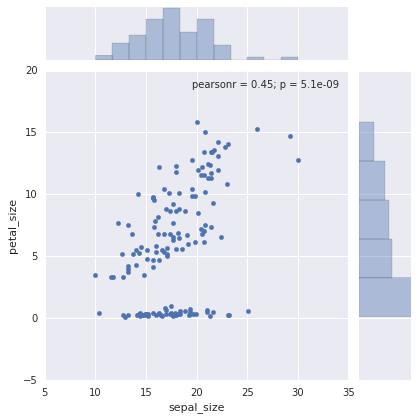

In [3]:
# your code
data['sepal_size'] = data['sepal_length'] * data['sepal_width']
data['petal_size'] = data['petal_length'] * data['petal_width']
sns.jointplot(x = "sepal_size", y = "petal_size", data = data)

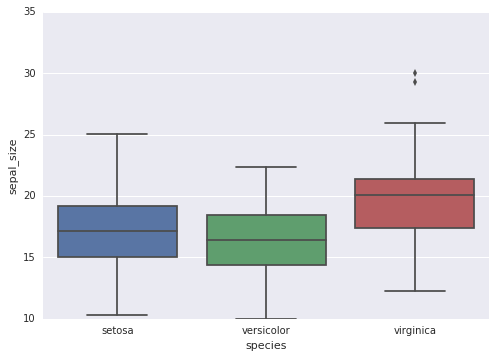

In [4]:
sns.boxplot(x = "species", y = "sepal_size", data = data)

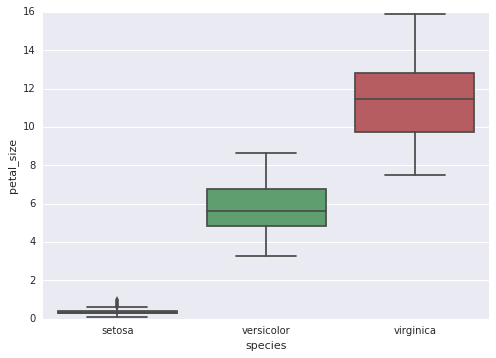

In [5]:
sns.boxplot(x = "species", y = "petal_size", data = data)

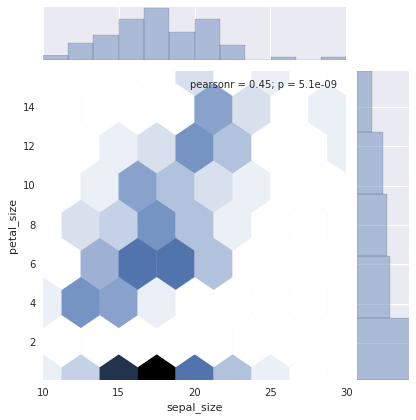

In [6]:
sns.jointplot(x = 'sepal_size', y = 'petal_size', data = data, kind = 'hex')

## 练习2：餐厅小费情况分析
* 小费和总消费之间的关系（散点图+回归分析）
* 男性顾客和女性顾客，谁更慷慨（箱图或者提琴图）
* 抽烟与否是否会对小费金额产生影响（箱图或者提琴图）
* 工作日和周末，什么时候顾客给的小费更慷慨（箱图或者提琴图）
* 午饭和晚饭，哪一顿顾客更愿意给小费（箱图或者提琴图）
* 就餐人数是否会对慷慨度产生影响（箱图或者提琴图）
* 性别+抽烟的组合因素对慷慨度的影响（统计柱状图）

In [2]:
data = sns.load_dataset("tips")
data.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


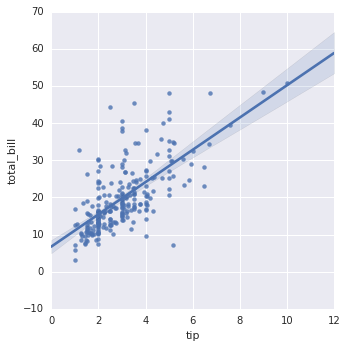

In [8]:
# your code
sns.lmplot(x = "tip", y = "total_bill", data = data)

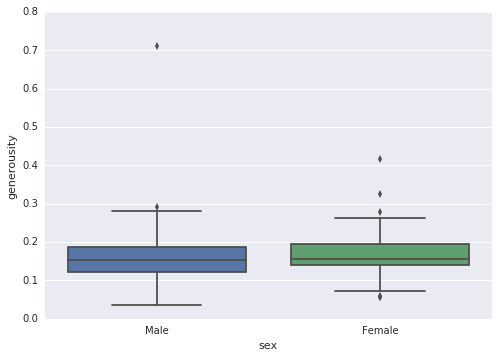

In [3]:
data['generousity'] = data['tip'] / data['total_bill']
sns.boxplot(x = "sex", y = "generousity", data = data)

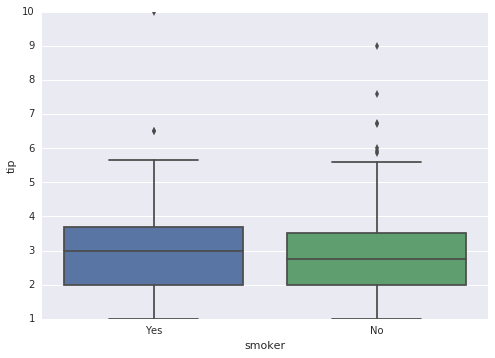

In [10]:
sns.boxplot(x = "smoker", y = "tip", data = data)

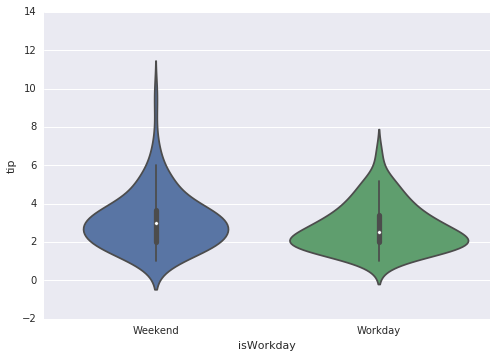

In [11]:
data['isWorkday'] = data['day'].apply(lambda x: not x in ['Sat', 'Sun'])
ax = sns.violinplot(x = "isWorkday", y = "tip", data = data, bw = 0.5, scale = "area", scale_hue = False)
ax.set_xticklabels(["Weekend", "Workday"])

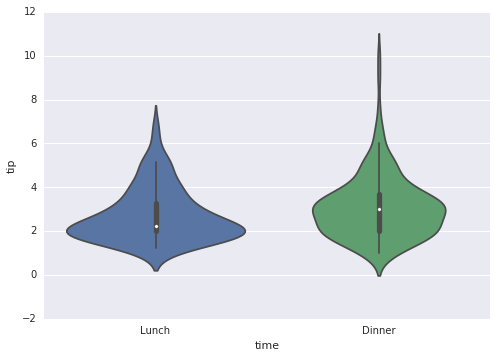

In [12]:
sns.violinplot(x = "time", y = "tip", data = data, scale = "area", scale_hue = False)

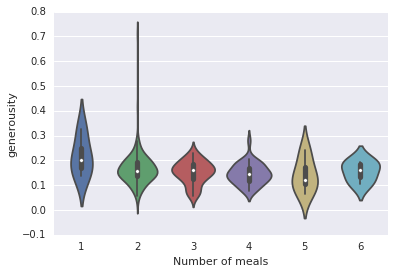

In [132]:
ax = sns.violinplot(x = "size", y = "generousity", data = data, scale = "area", scale_hue = False)
ax.set_xlabel('Number of meals')

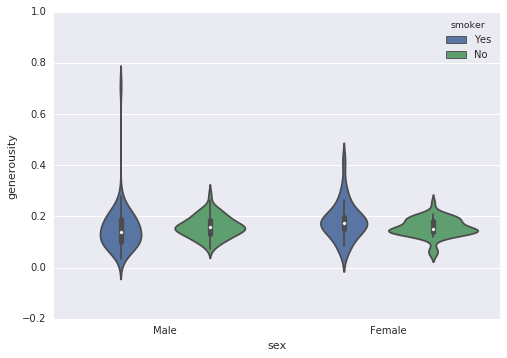

In [5]:
sns.violinplot(x = "sex", y = "generousity", hue = 'smoker', data = data, scale = "area", scale_hue = False)

## 练习3：泰坦尼克号海难幸存状况分析
* 不同仓位等级中幸存和遇难乘客的分布（箱图或者提琴图）
* 幸存和遇难乘客的票价分布（箱图或者提琴图）
* 幸存和遇难乘客的年龄分布（箱图或者提琴图）
* 不同上船港口的乘客仓位等级分布（箱图或者提琴图）
* 幸存和遇难乘客堂兄弟姐妹的数量分布（箱图或者提琴图）
* 幸存和遇难乘客父母子女的数量分布（箱图或者提琴图）
* 单独乘船与否和幸存之间的关系（统计柱状图）
* 乘客年龄和船票价格之间的关系（线性回归模型）
* 乘客性别和仓位等级之间的关系（统计柱状图）
* 乘客年龄和仓位等级之间的关系（带抖动的散点图）

In [134]:
data = sns.load_dataset("titanic")
data.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


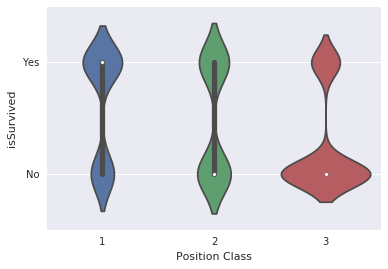

In [137]:
# your code
#第一问选的题目不太好
ax = sns.violinplot(x = "pclass", y = "survived", data = data, scale = "count", scale_hue = False)
ax.set_xlabel('Position Class')
ax.set_ylabel('isSurvived')
ax.set_yticks([0, 1])
ax.set_yticklabels(['No', 'Yes'])

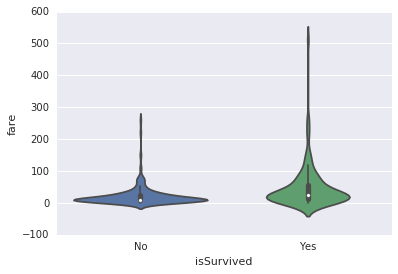

In [138]:
ax = sns.violinplot(x = "survived", y = "fare", data = data, scale = "count", scale_hue = False)
ax.set_xlabel('isSurvived')
ax.set_xticks([0, 1])
ax.set_xticklabels(['No', 'Yes'])

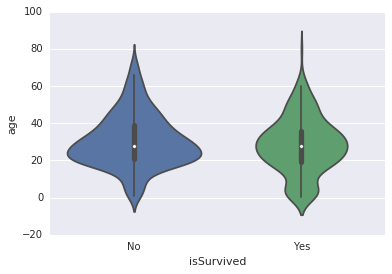

In [140]:
ax = sns.violinplot(x = "survived", y = "age", data = data, scale = "count", scale_hue = False)
ax.set_xlabel('isSurvived')
ax.set_xticks([0, 1])
ax.set_xticklabels(['No', 'Yes'])

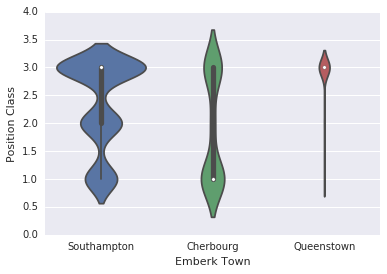

In [141]:
ax = sns.violinplot(x = "embark_town", y = "pclass", data = data, scale = "count", scale_hue = False)
ax.set_xlabel('Emberk Town')
ax.set_ylabel('Position Class')

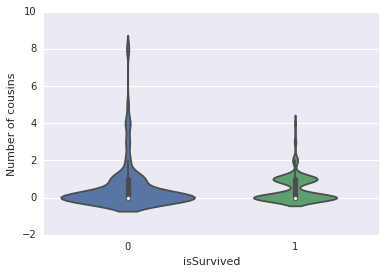

In [142]:
ax = sns.violinplot(x = "survived", y = "sibsp", data = data, scale = "count", scale_hue = False)
ax.set_xlabel('isSurvived')
ax.set_ylabel('Number of cousins')

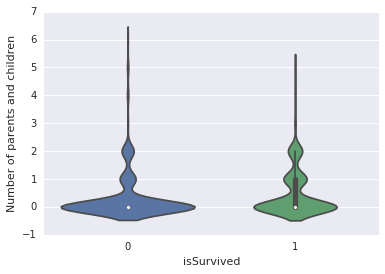

In [143]:
ax = sns.violinplot(x = "survived", y = "parch", data = data, scale = "count", scale_hue = False)
ax.set_xlabel('isSurvived')
ax.set_ylabel('Number of parents and children')

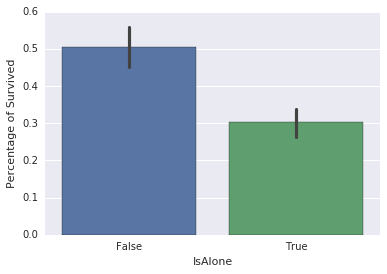

In [144]:
ax = sns.barplot(x = "alone", y = "survived", data = data)
ax.set_xlabel('IsAlone')
ax.set_ylabel('Percentage of Survived')

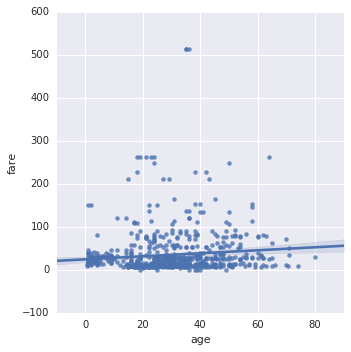

In [145]:
ax = sns.lmplot(x = "age", y = "fare", data = data)
#ax.set(ylim=(0, 300))

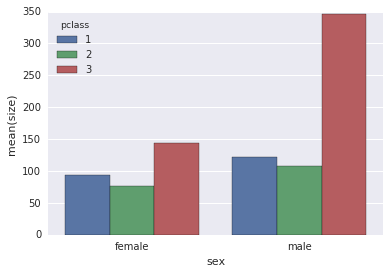

In [146]:
pclass_data = data[['sex', 'pclass']].groupby(['sex', 'pclass']).size()
pclass_data = pclass_data.reset_index()
pclass_data.columns = ['sex', 'pclass', 'size']
sns.barplot(x = "sex", y = "size", hue = "pclass", data = pclass_data)

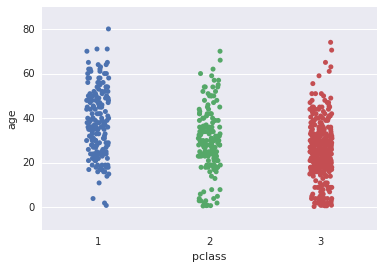

In [147]:
sns.stripplot(x = "pclass", y = "age", data = data, jitter = True)